In [96]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from source.acquire_m import *
from source.model_marley import *
from scipy import stats as scs
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
wrangle_obj = wrangle('Plasmodium')

In [98]:
acquire_df = wrangle_obj.acquire_data()
acquire_df

,index,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,0,[],Homo sapiens,Duffy antigen/chemokine receptor,14.000,False,CHEMBL2321626,"[{'accession': 'Q16570', 'component_descriptio...",SINGLE PROTEIN,9606
1,1,"[{'xref_id': 'P13922', 'xref_name': None, 'xre...",Plasmodium falciparum K1,Dihydrofolate reductase,6.000,False,CHEMBL1939,"[{'accession': 'P13922', 'component_descriptio...",SINGLE PROTEIN,5839
2,2,"[{'xref_id': 'Q02768', 'xref_name': None, 'xre...",Plasmodium falciparum,Cytochrome b,6.000,False,CHEMBL1777,"[{'accession': 'Q02768', 'component_descriptio...",SINGLE PROTEIN,5833
3,3,"[{'xref_id': 'P05227', 'xref_name': None, 'xre...",Plasmodium falciparum,Histidine-rich protein,6.000,False,CHEMBL1923,"[{'accession': 'P05227', 'component_descriptio...",SINGLE PROTEIN,5833
4,4,"[{'xref_id': 'Q25704', 'xref_name': None, 'xre...",Plasmodium falciparum,Dihydropteroate synthetase,6.000,False,CHEMBL2013,"[{'accession': 'Q25704', 'component_descriptio...",SINGLE PROTEIN,5833
...,...,...,...,...,...,...,...,...,...,...
107,107,[],Plasmodium falciparum (isolate 3D7),Purine nucleoside phosphorylase,6.000,False,CHEMBL4523389,"[{'accession': 'Q8I3X4', 'component_descriptio...",SINGLE PROTEIN,36329
108,108,[],Plasmodium falciparum (isolate 3D7),Plasmepsin X,6.000,False,CHEMBL4523390,"[{'accession': 'Q8IAS0', 'component_descriptio...",SINGLE PROTEIN,36329
109,109,[],Plasmodium falciparum (isolate 3D7),Casein kinase I,6.000,False,CHEMBL4523391,"[{'accession': 'Q8IHZ9', 'component_descriptio...",SINGLE PROTEIN,36329
110,110,[],Plasmodium falciparum,Glutamine amidotransferase,6.000,False,CHEMBL4523484,"[{'accession': 'Q9U775', 'component_descriptio...",SINGLE PROTEIN,5833


In [99]:
bioactivity_df = wrangle_obj.get_bioactivity_data()
bioactivity_df

List of single protein ChEMBL ID's from chosen disease:
0      CHEMBL2321626
1         CHEMBL1939
2         CHEMBL1777
3         CHEMBL1923
4         CHEMBL2013
           ...      
107    CHEMBL4523389
108    CHEMBL4523390
109    CHEMBL4523391
110    CHEMBL4523484
111    CHEMBL4630875
Name: target_chembl_id, Length: 112, dtype: object
Input a single protein target ID from the list:CHEMBL1923


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
index,,,,,,,,,,,,,,,,,,,,,
0,NaN,478774,[],CHEMBL763000,Inhibition of beta-hematin formation in Plasmo...,F,NaN,NaN,BAO_0000190,BAO_0000019,...,Plasmodium falciparum,Histidine-rich protein,5833,NaN,NaN,IC50,uM,UO_0000065,NaN,94.000
1,NaN,479914,[],CHEMBL763000,Inhibition of beta-hematin formation in Plasmo...,F,NaN,NaN,BAO_0000190,BAO_0000019,...,Plasmodium falciparum,Histidine-rich protein,5833,NaN,NaN,IC50,uM,UO_0000065,NaN,86.000
2,NaN,483688,[],CHEMBL764094,Inhibition of 1-monooleoyl glycerol (MOG) indu...,F,NaN,NaN,BAO_0000190,BAO_0000019,...,Plasmodium falciparum,Histidine-rich protein,5833,NaN,NaN,IC50,uM,UO_0000065,NaN,200.000
3,NaN,483693,[],CHEMBL764094,Inhibition of 1-monooleoyl glycerol (MOG) indu...,F,NaN,NaN,BAO_0000190,BAO_0000019,...,Plasmodium falciparum,Histidine-rich protein,5833,NaN,NaN,IC50,uM,UO_0000065,NaN,200.000
4,Not Determined,486008,[],CHEMBL857554,Inhibition of 1-monooleoyl glycerol (MOG) indu...,F,NaN,NaN,BAO_0000190,BAO_0000019,...,Plasmodium falciparum,Histidine-rich protein,5833,NaN,NaN,IC50,nM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,NaN,2724975,[],CHEMBL1051117,Inhibition of hemozoin formation after 48 hrs ...,F,NaN,NaN,BAO_0000190,BAO_0000019,...,Plasmodium falciparum,Histidine-rich protein,5833,NaN,NaN,IC50,uM,UO_0000065,NaN,20.000
206,NaN,2724976,[],CHEMBL1051116,Inhibition of hemozoin formation after 48 hrs ...,F,NaN,NaN,BAO_0000190,BAO_0000019,...,Plasmodium falciparum,Histidine-rich protein,5833,NaN,NaN,IC50,uM,UO_0000065,NaN,35.000
207,NaN,2724977,[],CHEMBL1051117,Inhibition of hemozoin formation after 48 hrs ...,F,NaN,NaN,BAO_0000190,BAO_0000019,...,Plasmodium falciparum,Histidine-rich protein,5833,NaN,NaN,IC50,uM,UO_0000065,NaN,40.000


In [8]:
wrangle_obj.prepare_dataframe()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL65735,CCN(CC)CCCC(C)Nc1cc(CCCCCCCCCCc2cc(NC(C)CCCN(C...,"94,000.000",INACTIVE,709.124,11.534,2.000,6.000,4.027
1,CHEMBL66482,CCN(CC)CCCC(C)Nc1cc(CCCCCCCCCCCCc2cc(NC(C)CCCN...,"86,000.000",INACTIVE,737.178,12.314,2.000,6.000,4.066
2,CHEMBL122117,CC(C)CN(CCCN1CCN(CCCNc2cnccn2)CC1)CC(C)C,"200,000.000",INACTIVE,390.620,2.900,1.000,6.000,3.699
3,CHEMBL419060,CC(C)CN(CCCN1CCN(CCCNCc2ccncc2)CC1)CC(C)C,"200,000.000",INACTIVE,403.659,3.183,1.000,5.000,3.699
4,CHEMBL124203,CC(C)CN(CCCN1CCN(CCCNCc2ccccc2)CC1)CC(C)C,NaN,INTERMEDIATE,402.671,3.788,1.000,4.000,NaN
...,...,...,...,...,...,...,...,...,...
205,CHEMBL550607,COc1ccc(C(Sc2ccc3ccccc3c2)c2cccnc2)cc1,"20,000.000",INACTIVE,357.478,6.125,0.000,3.000,4.699
206,CHEMBL558528,COc1ccc(C(Sc2nc3ccccc3s2)c2cccnc2)cc1,"35,000.000",INACTIVE,364.495,5.582,0.000,5.000,4.456
207,CHEMBL558528,COc1ccc(C(Sc2nc3ccccc3s2)c2cccnc2)cc1,"40,000.000",INACTIVE,364.495,5.582,0.000,5.000,4.398
208,CHEMBL560880,COc1ccc(C(Sc2ccc(C)cc2)c2ccccn2)cc1,"40,000.000",INACTIVE,321.445,5.280,0.000,3.000,4.398


In [100]:
wrangle_obj.preprocess_bioactivity_data(tests = True)

Saving 210 molecules.

Kruskal Wallis H tests for molecular descriptors (active vs. inactive)...

 MW
   H statistic = 34, p = 0.000
   Different distribution. Reject H0.

 LogP
   H statistic = 4, p = 0.145
   Same distribution. Fail to reject H0.

 NumHDonors
   H statistic = 8, p = 0.020
   Different distribution. Reject H0.

 NumHAcceptors
   H statistic = 15, p = 0.001
   Different distribution. Reject H0.

Computing fingerprints (takes several minutes if molecules > 1000)...
Success!



In [10]:
target_id = wrangle_obj.user_target

In [11]:
bioactivity_df = pd.read_csv(f'{target_id}_bioactivity_preprocessed.csv')
bioactivity_df.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL65735,CCN(CC)CCCC(C)Nc1cc(CCCCCCCCCCc2cc(NC(C)CCCN(C...,"94,000.000",INACTIVE,709.124,11.534,2.000,6.000,4.027
1,CHEMBL66482,CCN(CC)CCCC(C)Nc1cc(CCCCCCCCCCCCc2cc(NC(C)CCCN...,"86,000.000",INACTIVE,737.178,12.314,2.000,6.000,4.066
2,CHEMBL122117,CC(C)CN(CCCN1CCN(CCCNc2cnccn2)CC1)CC(C)C,"200,000.000",INACTIVE,390.620,2.900,1.000,6.000,3.699
3,CHEMBL419060,CC(C)CN(CCCN1CCN(CCCNCc2ccncc2)CC1)CC(C)C,"200,000.000",INACTIVE,403.659,3.183,1.000,5.000,3.699
4,CHEMBL124203,CC(C)CN(CCCN1CCN(CCCNCc2ccccc2)CC1)CC(C)C,NaN,INTERMEDIATE,402.671,3.788,1.000,4.000,NaN


In [12]:
bioactivity_df.shape

(210, 9)

In [13]:
fingerprint_df = pd.read_csv(f'{target_id}_pubchem_fp.csv')
fingerprint_df.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL66482,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL122117,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL419060,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL124203,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL65735,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
fingerprint_df.shape

(210, 882)

Three representations of molecule CHEMBL65735:
1. SMILES notation: CCN(CC)CCCC(C)Nc1cc(CCCCCCCCCCc2cc(NC(C)CCCN(CC)CC)c3ccccc3n2)nc2ccccc12
2. Chemical fingerprint: [1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0

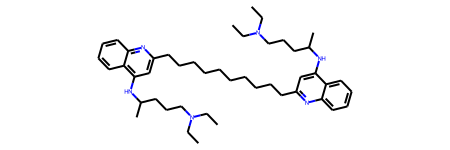

In [15]:
mol = bioactivity_df.molecule_chembl_id.values[0]
SMILES = bioactivity_df.canonical_smiles[bioactivity_df.molecule_chembl_id==mol].values[0]
fingerprint = np.array(fingerprint_df[fingerprint_df.Name==mol])[0][1:]

print(f'Three representations of molecule {mol}:')
print('1. SMILES notation:', SMILES)
print('2. Chemical fingerprint:', fingerprint)
print('3. Molecular Visualization')
Chem.MolFromSmiles(SMILES) #an example molecule

<a id='Model'></a>
## 4. Modeling the chemical fingerprints

In this part, we use machine learning to determine the charchteristics of molecules with a high chance of being viable drug candidates.

A note on modeling: $R^2$ is the percent of the variance in [potency](https://en.wikipedia.org/wiki/Potency_(pharmacology)) (as measured by $pIC_{50}$) is explained by the chemical fingerprint of the molecule.

In [16]:
# Modeling imports
from sklearn.metrics import mean_squared_error
from math import sqrt

# Regression models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [17]:
modeling_df, target = premodeling_processing(bioactivity_df, fingerprint_df)
modeling_df.head()

,molecule_id,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL66482,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737.178,12.314,2.000,6.000
1,CHEMBL122117,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,390.620,2.900,1.000,6.000
2,CHEMBL419060,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,403.659,3.183,1.000,5.000
4,CHEMBL65735,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,709.124,11.534,2.000,6.000
5,CHEMBL124723,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,474.137,5.312,1.000,5.000


In [18]:
target.bioactivity_class.value_counts()

INACTIVE        270
ACTIVE          179
INTERMEDIATE      3
Name: bioactivity_class, dtype: int64

In [86]:
reg_names = ['Random Forrest Regressor', 'Tweedies Regressor', 'Lasso Lars']
reg_types = [RandomForestRegressor(), TweedieRegressor(), LassoLars()]

cls_names = ['Decision Tree', 'Gaussian NB', 'Multinomial NB']
cls_types = [DecisionTreeClassifier(), GaussianNB(), MultinomialNB()]

In [87]:
model_obj = Modeling_class(modeling_df, target, reg_types, reg_names, cls_types, cls_names)

#### Regression:
Calculating baseline using dummy regressor

In [88]:
X_data = model_obj.df

In [89]:
dr = DummyRegressor(strategy='mean').fit(X_data, target.pIC50) #Baseline
yhat_baseline = target.pIC50.mean()
yhat_baseline

y_pred = [yhat_baseline for i in range(len(target.pIC50))]
rmse = sqrt(mean_squared_error(target.pIC50, y_pred))

In [90]:
#Evaluation
print(f'Baseline R^2: {round(dr.score(X_data, target.pIC50),3)}\nBaseline RMSE: {round(rmse, 3)}')

Baseline R^2: 0.0
Baseline RMSE: 2.405


Running actual regression modeling

In [91]:
avg_metrics = model_obj.regression_modeling(splits = 3)

Have not run scaling method yet, running now...
All done! Moving on to modeling, this may take a while...
Modeling done! Average scores are abstract represntations of how well this model type did, not actual scores.


In [92]:
avg_metrics

avg_score
model                    metric                                
Random Forrest Regressor neg_root_mean_squared_error      2.146
                         r2                               0.221
Tweedies Regressor       neg_root_mean_squared_error      2.239
                         r2                               0.152
Lasso Lars               neg_root_mean_squared_error      2.436
                         r2                              -0.006

### Evaluation Visualizations:

In [136]:
model_obj.model_scores_reg

[([RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor()],
  {'fit_time': array([0.42856216, 0.44971085, 0.39816284]),
   'score_time': array([0.02003193, 0.01652598, 0.0135839 ]),
   'estimator': [RandomForestRegressor(),
    RandomForestRegressor(),
    RandomForestRegressor()],
   'test_neg_root_mean_squared_error': array([-2.32449303, -1.90282598, -2.210841  ]),
   'test_r2': array([0.17856745, 0.28795841, 0.19657777])}),
 ([TweedieRegressor(), TweedieRegressor(), TweedieRegressor()],
  {'fit_time': array([0.017663  , 0.01593709, 0.02166891]),
   'score_time': array([0.01023102, 0.01047969, 0.00727892]),
   'estimator': [TweedieRegressor(), TweedieRegressor(), TweedieRegressor()],
   'test_neg_root_mean_squared_error': array([-2.40035931, -2.02287438, -2.29358218]),
   'test_r2': array([0.12407298, 0.19527954, 0.13531598])}),
 ([LassoLars(), LassoLars(), LassoLars()],
  {'fit_time': array([0.01186299, 0.01095295, 0.01068282]),
   'score_time': array([0.00790787,

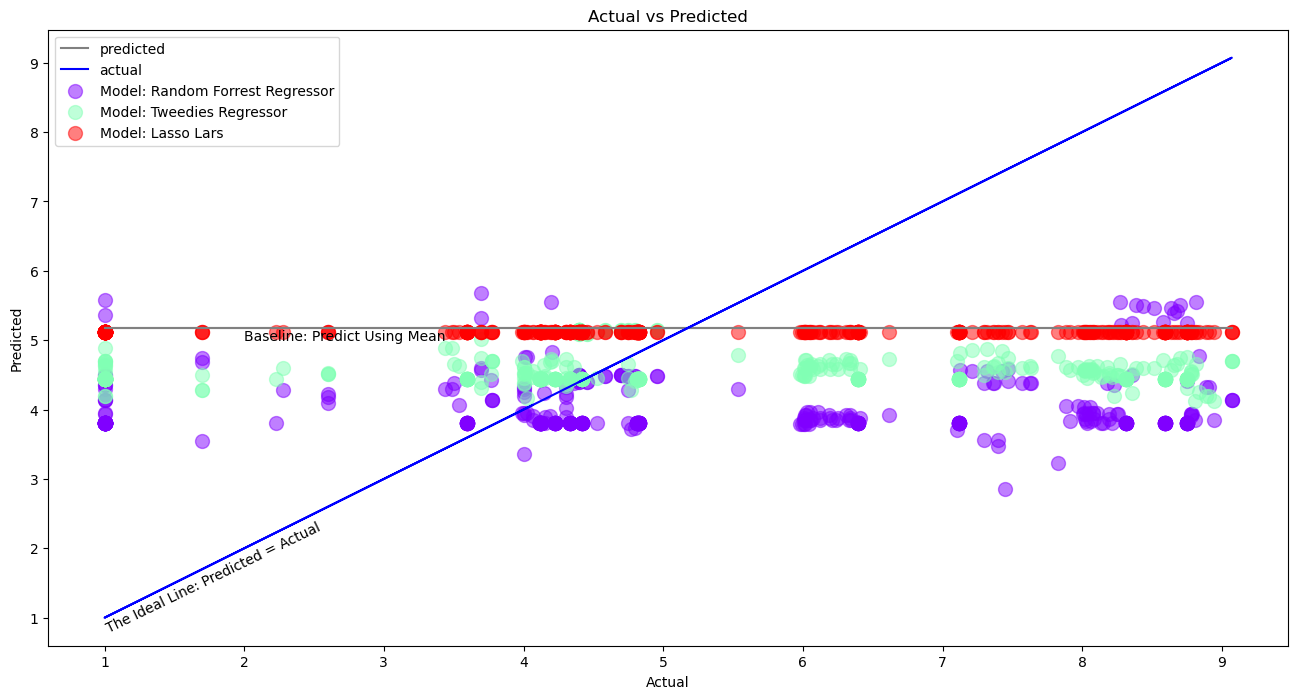

In [147]:
# This is broken, just like my brain after trying to make it work for an hour
# Just kidding, never use linear regression or it will break EVERYTHING
model_obj.plot_actual_vs_pred()

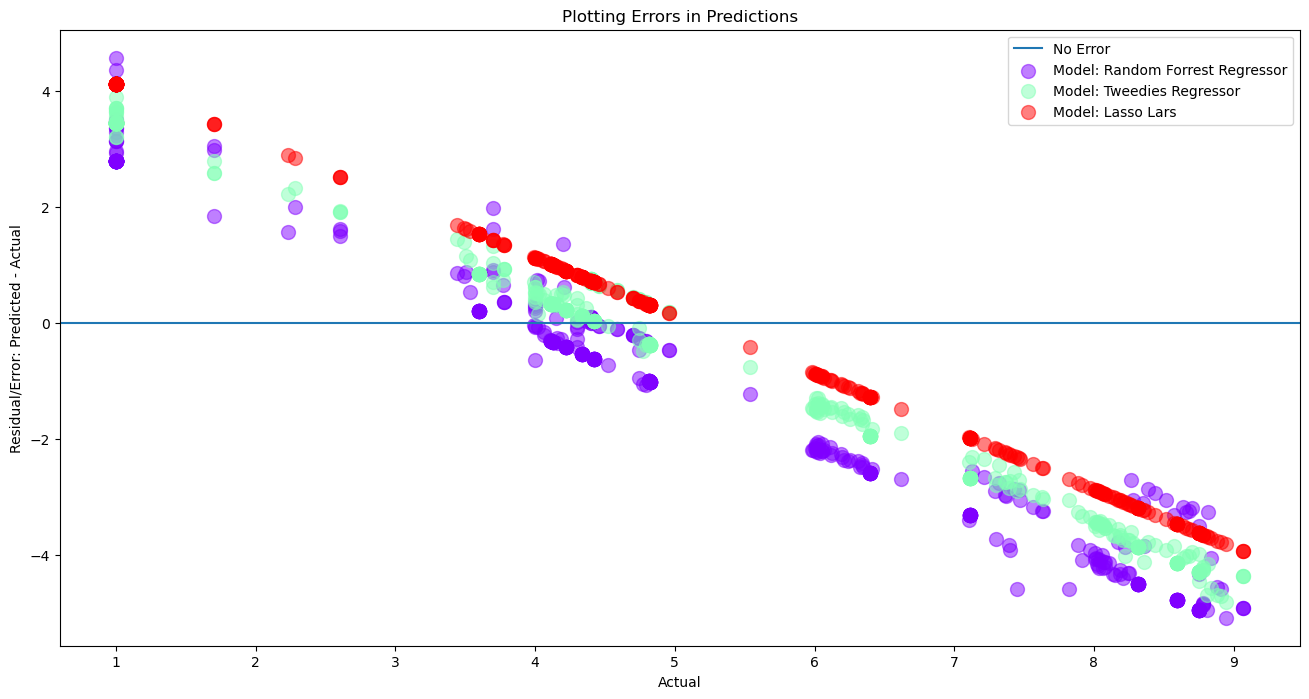

In [148]:
model_obj.plot_errors()

#### Classification:
Calculating baseline using most common mean.

In [297]:
# Mode in bioactivity class
print(f'Most common class label: {target.bioactivity_class.value_counts().index[0]}\nEncoded label as: {target.encoded_bac.value_counts().index[0]}')

Most common class label: ACTIVE
Encoded label as: 0


In [298]:
dc = DummyClassifier(strategy='most_frequent').fit(X_data, target.encoded_bac) #Baseline
#Evaluation
print(f'Baseline Accuracy: {round(dc.score(X_data, target.encoded_bac),3) * 100}%')

Baseline Accuracy: 57.9%


In [299]:
model_obj.classification_modeling()

Scaling has already been run. Moving on to modeling, this may take a while...


,model,average_accuracy%
0,Decision Tree,66.970
2,Multinomial NB,62.770
1,Gaussian NB,58.500
